# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

**Definitions of Churn**

- **Revenue-based churn:** Customers who have not utilized any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.


- **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- **High Value Churn:** In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

**Business Objective**

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

# **Segment - I: Data Understanding**

## Importing the libraries and reading the dataset

In [1]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing StandardScaler function for feature scaling

from sklearn.preprocessing import StandardScaler

# Using sklearn library and importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Using imblearn library importing SMOTE,under_sampling and over_sampling

from imblearn.over_sampling import SMOTE

# Importing statsmodel library

import statsmodels.api as sm

# Using statsmodel library and importing variance inflation factor (VIF) function for calculating VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using sklearn library and importing metrics function for using various metrics available to evalaute the model.

from sklearn import metrics

# Using sklearn library and importing various metrics to evaluate the model.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Using sklearn library and importing precison recall curve to find optimal cutoff.

from sklearn.metrics import precision_recall_curve

In [2]:
# Reading the dataset

telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Printing the first five rows of the dataframe 'telecom'

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## **Data Inspection**

### Basic Structure Checking

In [4]:
# Checking the shape of dataframe

telecom.shape

(99999, 226)

**There are 99999 rows and 226 columns initially.**

In [5]:
# Finding the basic statistics for numerical variables

telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# create backup of data for any further reference
original = telecom.copy()

## **Data Cleaning**

### Segregating variables

In [7]:
# create column name list by types of columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in telecom.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list

print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % 
      (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not

print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Handling missing values

In [8]:
# Calculating the missing values in each column of the dataframe

telecom.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [9]:
# Calculating the percentage of missing values in each column

round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

### Missing Value Imputation

#### (a) Imputing with zeroes

In [10]:
# some recharge columns have minimum value of 1 while some don't

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge

telecom.loc[telecom.total_rech_data_6.isnull() & telecom.date_of_last_rech_data_6.isnull(), 
          ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [12]:
# create a list of recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [13]:
# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [14]:
# let's make sure values are imputed correctly

print("Missing value ratio:\n")
print(round(100*(telecom[zero_impute].isnull().sum())/len(telecom), 2).sort_values(ascending=False))

# summary
print("\n\nSummary statistics\n")
print(telecom[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [15]:
# drop id and date columns

print("Shape before dropping: ", telecom.shape)
telecom = telecom.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecom.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### (b) Replace NaN values in categorical variables

**We will replace missing values in the categorical values with '-1' where '-1' will be a new category.**

In [16]:
# replace missing values with '-1' in categorical columns

telecom[cat_cols] = telecom[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
# missing value ratio

print("Missing value ratio:\n")
print(round(100*(telecom[cat_cols].isnull().sum())/len(telecom), 2).sort_values(ascending=False))

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


#### (c) Drop variables with more than a given threshold of missing values

In [18]:
# Finding missing value percentage in each column

null_percent = round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)
print(null_percent)

# List of columns having more than 35% null values.

null_percent[null_percent > 35].index

arpu_3g_6             74.85
count_rech_3g_6       74.85
count_rech_2g_6       74.85
arpu_2g_6             74.85
arpu_3g_7             74.43
count_rech_3g_7       74.43
count_rech_2g_7       74.43
arpu_2g_7             74.43
count_rech_3g_9       74.08
arpu_3g_9             74.08
arpu_2g_9             74.08
count_rech_2g_9       74.08
count_rech_2g_8       73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
arpu_3g_8             73.66
std_og_t2t_mou_9       7.75
std_og_t2m_mou_9       7.75
std_og_t2f_mou_9       7.75
std_og_t2c_mou_9       7.75
std_og_mou_9           7.75
spl_og_mou_9           7.75
og_others_9            7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_t2c_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2o_mou_9       7.75
std_ic_mou_9           7.75
spl_ic_mou_9           7.75
isd_ic_mou_9           7.75
ic_others_9            7.75
loc_og_mou_9        

Index(['arpu_3g_6', 'count_rech_3g_6', 'count_rech_2g_6', 'arpu_2g_6',
       'arpu_3g_7', 'count_rech_3g_7', 'count_rech_2g_7', 'arpu_2g_7',
       'count_rech_3g_9', 'arpu_3g_9', 'arpu_2g_9', 'count_rech_2g_9',
       'count_rech_2g_8', 'count_rech_3g_8', 'arpu_2g_8', 'arpu_3g_8'],
      dtype='object')

In [19]:
#Dropping the columns with missing values more than 70%

print("Shape before dropping: ", telecom.shape)
telecom.drop(['arpu_3g_6', 'count_rech_3g_6', 'count_rech_2g_6', 'arpu_2g_6',
       'arpu_3g_7', 'count_rech_3g_7', 'count_rech_2g_7', 'arpu_2g_7',
       'count_rech_3g_9', 'arpu_3g_9', 'arpu_2g_9', 'count_rech_2g_9',
       'count_rech_2g_8', 'count_rech_3g_8', 'arpu_2g_8', 'arpu_3g_8'],axis=1,inplace=True)
print("Shape after dropping: ", telecom.shape)

Shape before dropping:  (99999, 212)
Shape after dropping:  (99999, 196)


In [20]:
# Finding missing value percentage in each column

round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)

std_ic_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
isd_og_mou_9          7.75
spl_og_mou_9          7.75
og_others_9           7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
loc_ic_mou_9          7.75
std_ic_t2m_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_ic_t2o_mou_9      7.75
std_ic_mou_9          7.75
loc_og_t2m_mou_9      7.75
std_og_t2c_mou_9      7.75
roam_og_mou_9         7.75
ic_others_9           7.75
onnet_mou_9           7.75
roam_ic_mou_9         7.75
isd_ic_mou_9          7.75
offnet_mou_9          7.75
spl_og_mou_8          5.38
std_og_t2c_mou_8      5.38
og_others_8           5.38
std_og_t2m_mou_8      5.38
loc_ic_mou_8          5.38
std_og_t2f_mou_8      5.38
loc_ic_t2f_mou_8      5.38
onnet_mou_8           5.38
l

#### (d) imputing with mean/median

In [21]:
# replace missing values with 'mean' in missing value columns

telecom = telecom.apply(lambda x: x.fillna(x.median()))

In [22]:
# Finding missing value percentage in each column

round(100*(telecom.isnull().sum())/len(telecom), 2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
isd_ic_mou_6          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
isd_ic_mou_7          0.0
spl_ic_mou_9          0.0
std_og_t2o_mou        0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_9      0.0
std_ic_mou_6

## **Data Preparation**

### Filtering High Value Customers

**Calculate total data recharge amount**

In [23]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount

telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

**add total data recharge and total recharge to get total combined recharge amount for a month**

In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount

telecom['amt_data_6'] = telecom['total_rech_amt_6'] + telecom['total_data_rech_6']
telecom['amt_data_7'] = telecom['total_rech_amt_7'] + telecom['total_data_rech_7']

In [25]:
# calculate average recharge done by customer in June and July

telecom['av_amt_data_6_7'] = (telecom['amt_data_6'] + telecom['amt_data_7'])/2

In [26]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(telecom['av_amt_data_6_7'].quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [27]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

telecom_filtered = telecom.loc[telecom['av_amt_data_6_7'] >= telecom['av_amt_data_6_7'].quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(30001, 201)

In [28]:
# delete variables created to filter high-value customers

telecom_filtered = telecom_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_filtered.shape

(30001, 196)

**We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.**

### Tagging Churners

In [29]:
# calculate total incoming and outgoing minutes of usage

telecom_filtered['total_calls_mou_9'] = telecom_filtered.total_ic_mou_9 + telecom_filtered.total_og_mou_9

In [30]:
# calculate 2g and 3g data consumption

telecom_filtered['total_internet_mb_9'] =  telecom_filtered.vol_2g_mb_9 + telecom_filtered.vol_3g_mb_9

In [31]:
# create churn variable: those who have not used either calls or internet in the month of September 
#are customers who have churned

# 0 - not churn, 1 - churn

telecom_filtered['Churn'] = telecom_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) 
                                               else 0, axis=1)

In [32]:
# delete derived variables

telecome_filtered = telecom_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [33]:
# change data type to category

telecom_filtered.Churn = telecom_filtered.Churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_filtered.Churn.value_counts()*100/telecom_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: Churn, dtype: float64


## **Deriving New Variables**

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [34]:
telecom_filtered['arpu_diff'] = telecom_filtered.arpu_8 - ((telecom_filtered.arpu_6 + telecom_filtered.arpu_7)/2)

telecom_filtered['onnet_mou_diff'] = telecom_filtered.onnet_mou_8 - ((telecom_filtered.onnet_mou_6 + telecom_filtered.onnet_mou_7)/2)

telecom_filtered['offnet_mou_diff'] = telecom_filtered.offnet_mou_8 - ((telecom_filtered.offnet_mou_6 + telecom_filtered.offnet_mou_7)/2)

telecom_filtered['roam_ic_mou_diff'] = telecom_filtered.roam_ic_mou_8 - ((telecom_filtered.roam_ic_mou_6 + telecom_filtered.roam_ic_mou_7)/2)

telecom_filtered['roam_og_mou_diff'] = telecom_filtered.roam_og_mou_8 - ((telecom_filtered.roam_og_mou_6 + telecom_filtered.roam_og_mou_7)/2)

telecom_filtered['loc_og_mou_diff'] = telecom_filtered.loc_og_mou_8 - ((telecom_filtered.loc_og_mou_6 + telecom_filtered.loc_og_mou_7)/2)

telecom_filtered['std_og_mou_diff'] = telecom_filtered.std_og_mou_8 - ((telecom_filtered.std_og_mou_6 + telecom_filtered.std_og_mou_7)/2)

telecom_filtered['isd_og_mou_diff'] = telecom_filtered.isd_og_mou_8 - ((telecom_filtered.isd_og_mou_6 + telecom_filtered.isd_og_mou_7)/2)

telecom_filtered['spl_og_mou_diff'] = telecom_filtered.spl_og_mou_8 - ((telecom_filtered.spl_og_mou_6 + telecom_filtered.spl_og_mou_7)/2)

telecom_filtered['total_og_mou_diff'] = telecom_filtered.total_og_mou_8 - ((telecom_filtered.total_og_mou_6 + telecom_filtered.total_og_mou_7)/2)

telecom_filtered['loc_ic_mou_diff'] = telecom_filtered.loc_ic_mou_8 - ((telecom_filtered.loc_ic_mou_6 + telecom_filtered.loc_ic_mou_7)/2)

telecom_filtered['std_ic_mou_diff'] = telecom_filtered.std_ic_mou_8 - ((telecom_filtered.std_ic_mou_6 + telecom_filtered.std_ic_mou_7)/2)

telecom_filtered['isd_ic_mou_diff'] = telecom_filtered.isd_ic_mou_8 - ((telecom_filtered.isd_ic_mou_6 + telecom_filtered.isd_ic_mou_7)/2)

telecom_filtered['spl_ic_mou_diff'] = telecom_filtered.spl_ic_mou_8 - ((telecom_filtered.spl_ic_mou_6 + telecom_filtered.spl_ic_mou_7)/2)

telecom_filtered['total_ic_mou_diff'] = telecom_filtered.total_ic_mou_8 - ((telecom_filtered.total_ic_mou_6 + telecom_filtered.total_ic_mou_7)/2)

telecom_filtered['total_rech_num_diff'] = telecom_filtered.total_rech_num_8 - ((telecom_filtered.total_rech_num_6 + telecom_filtered.total_rech_num_7)/2)

telecom_filtered['total_rech_amt_diff'] = telecom_filtered.total_rech_amt_8 - ((telecom_filtered.total_rech_amt_6 + telecom_filtered.total_rech_amt_7)/2)

telecom_filtered['max_rech_amt_diff'] = telecom_filtered.max_rech_amt_8 - ((telecom_filtered.max_rech_amt_6 + telecom_filtered.max_rech_amt_7)/2)

telecom_filtered['total_rech_data_diff'] = telecom_filtered.total_rech_data_8 - ((telecom_filtered.total_rech_data_6 + telecom_filtered.total_rech_data_7)/2)

telecom_filtered['max_rech_data_diff'] = telecom_filtered.max_rech_data_8 - ((telecom_filtered.max_rech_data_6 + telecom_filtered.max_rech_data_7)/2)

telecom_filtered['av_rech_amt_data_diff'] = telecom_filtered.av_rech_amt_data_8 - ((telecom_filtered.av_rech_amt_data_6 + telecom_filtered.av_rech_amt_data_7)/2)

telecom_filtered['vol_2g_mb_diff'] = telecom_filtered.vol_2g_mb_8 - ((telecom_filtered.vol_2g_mb_6 + telecom_filtered.vol_2g_mb_7)/2)

telecom_filtered['vol_3g_mb_diff'] = telecom_filtered.vol_3g_mb_8 - ((telecom_filtered.vol_3g_mb_6 + telecom_filtered.vol_3g_mb_7)/2)

In [35]:
# let's look at summary of one of the difference variables
telecom_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## Delete columns that belong to the churn month (9th month)

In [36]:
# delete all variables relating to 9th month

telecom_filtered = telecom_filtered.filter(regex='[^9]$', axis=1)
telecom_filtered.shape

(30001, 173)

In [37]:
# extract all names that end with 9
col_9_names = telecom.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list

cat_cols = [col for col in cat_cols if col not in col_9_names]

cat_cols.append('Churn')

num_cols = [col for col in telecom_filtered.columns if col not in cat_cols]

# **Segment - II: Exploratory Data Analysis (EDA)**

In [38]:
# change columns data types

telecom_filtered[num_cols] = telecom_filtered[num_cols].apply(pd.to_numeric)
telecom_filtered[cat_cols] = telecom_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

## User Defined Function for Univariate & Bivariate Analysis

In [39]:
# create plotting functions

def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        sns.boxplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Data Imbalance Analysis

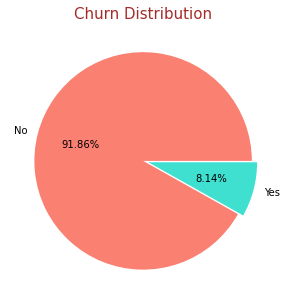

In [40]:
# Plotting the percentage of conversion in TARGET column

plt.figure(figsize=[5,5])
plt.pie(telecom_filtered.Churn.value_counts(normalize=True), labels= ['No', 'Yes'], 
        autopct='%.2f%%', explode=(0,0.05), colors=['salmon','turquoise'])
plt.title("Churn Distribution", fontsize=15, color= 'brown')
plt.show()

**Observations and Recommendations :**

**1. 8.64% of the total customers have churned and 91.36% have not churned.**

**2. There is huge Data imbalance in the target column - "churn"**

**3. "SMOTE" sampling can be used to handle this imbalance.**

## Univariate Analysis

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


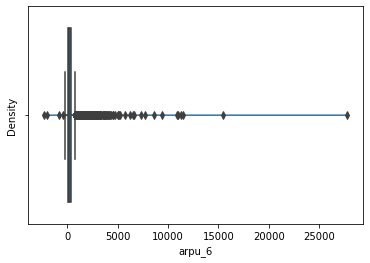

In [41]:
univariate(telecom.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


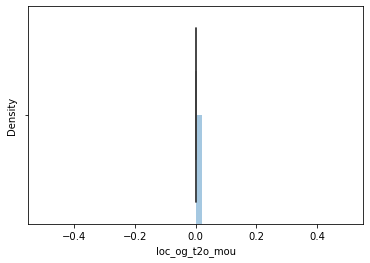

In [42]:
univariate(telecom.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


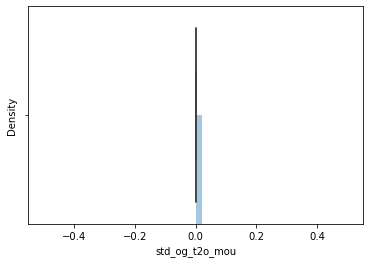

In [43]:
univariate(telecom.std_og_t2o_mou)

count    99999.000000
mean       127.604651
std        301.385516
min          0.000000
25%          7.410000
50%         32.360000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


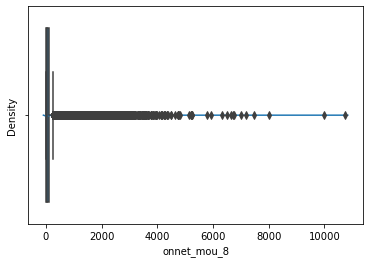

In [44]:
univariate(telecom.onnet_mou_8)

count    99999.000000
mean       182.356135
std        308.012127
min          0.000000
25%         31.230000
50%         87.290000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


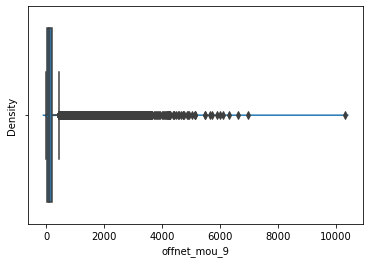

In [45]:
univariate(telecom.offnet_mou_9)

Variables are very **skewed** towards the left.

## Bivariate Analysis

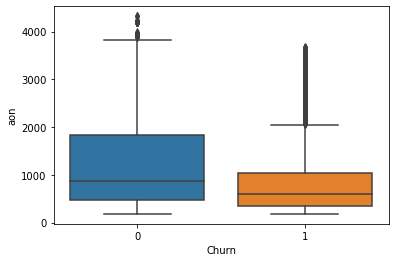

In [46]:
bivariate(telecom_filtered.Churn, telecom_filtered.aon)

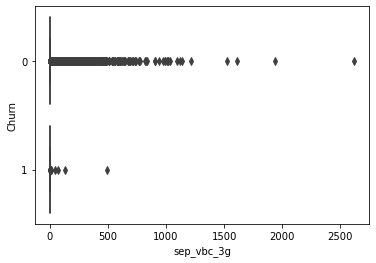

In [47]:
bivariate(telecom_filtered.sep_vbc_3g, telecom_filtered.Churn)

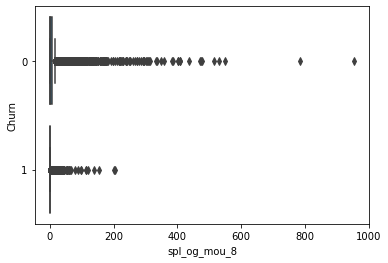

In [48]:
bivariate(telecom_filtered.spl_og_mou_8, telecom_filtered.Churn)

In [49]:
pd.crosstab(telecom_filtered.Churn, telecom_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
Churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [50]:
pd.crosstab(telecom_filtered.Churn, telecom_filtered.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# **Segment - III: Outliers Treatment**

## K Sigma Technique

In [51]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [52]:
# example of capping

sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [53]:
# cap outliers in the numeric columns
telecom_filtered[num_cols] =telecom_filtered[num_cols].apply(cap_outliers, axis=0)

# **Segment - IV : Data Preparation For Model Building**

In [54]:
# change churn to numeric
telecom_filtered['Churn'] = pd.to_numeric(telecom_filtered['Churn'])

## Data Splitting

### Dividing data into X and y

In [55]:
# divide data into train and test

X = telecom_filtered.drop("Churn", axis = 1)
y = telecom_filtered.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 4, stratify = y)

In [56]:
# print shapes of train and test sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 172)
(21000,)
(9001, 172)
(9001,)


## Aggregating the categorical columns

In [57]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').Churn.mean()
train.groupby('night_pck_user_7').Churn.mean()
train.groupby('night_pck_user_8').Churn.mean()
train.groupby('fb_user_6').Churn.mean()
train.groupby('fb_user_7').Churn.mean()
train.groupby('fb_user_8').Churn.mean()

fb_user_8
-1.0    0.140907
0.0     0.068602
1.0     0.024682
Name: Churn, dtype: float64

In [58]:
# replace categories with aggregated values in each categorical column

mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [59]:
# check data type of categorical columns - make sure they are numeric

X_train[[col for col in cat_cols if col not in ['Churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 28122 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  21000 non-null  float64
 1   night_pck_user_7  21000 non-null  float64
 2   night_pck_user_8  21000 non-null  float64
 3   fb_user_6         21000 non-null  float64
 4   fb_user_7         21000 non-null  float64
 5   fb_user_8         21000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


## Features Scaling

In [60]:
# Storing the non binary column names as a list for performaing StandardScaler

feature_col =[]
data_col = X_train.columns.to_list()

for col in data_col:
    if X_train[col].nunique() > 2:
        feature_col.append(col)
        

In [61]:
X_train.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,21000.0,21000.0,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.0,21000.0,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.0,21000.0,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21

In [62]:
# Instantiate the Scaler

scaler = StandardScaler()

# Fit the data into scaler and transform

X_train[feature_col] = scaler.fit_transform(X_train[feature_col])

# Checking the Head

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
28122,0.0,0.0,0.0,0.542217,2.317333,0.546706,-0.373263,-0.344415,-0.543887,0.096055,0.139269,0.110366,-0.294293,-0.254555,-0.167018,-0.306668,-0.282960,-0.205594,0.108478,-0.216155,-0.377999,1.057031,1.135593,0.962371,1.162607,0.141792,1.582172,-0.351359,-0.345438,-0.350563,0.766726,0.623478,0.501606,-0.417928,-0.257286,-0.437729,-0.481005,-0.446573,-0.432551,-0.241335,-0.234419,-0.235245,0.0,0.0,0.0,-0.572295,-0.456774,-0.545175,0.403275,1.146105,-0.108632,-0.484450,0.446584,-0.499343,-0.361143,-0.049565,-0.050792,-0.136416,-0.093557,-0.242570,1.496802,0.354326,-0.165894,2.253375,1.525204,1.082698,-0.073256,0.856632,2.070758,2.046043,1.231054,0.869358,0.460333,0.287006,-0.355813,-0.118921,-0.201307,-0.249307,-0.268037,0.019188,-0.155084,0.0,0.0,0.0,0.061774,-0.036316,-0.350611,1.766461,0.957338,0.584186,-0.430834,-0.218902,-0.279370,0.507221,-0.254977,-0.253198,-0.209972,-0.217144,-0.217802,-0.444093,-0.540444,-0.583432,0.611027,2.031026,0.715677,0.674315,2.877432,0.749200,1.494284,2.446247,1.553410,-0.673843,-0.680633,0.200919,-0.770865,-0.780576,0.839178,-0.767630,-0.782887,1.148875,-0.468210,-0.463971,-0.395892,-0.494477,-0.512132,-0.298765,1.116600,1.153777,-0.931725,-0.424602,-0.431254,-0.398429,-0.470204,-0.485361,0.021503,-0.402097,-0.399227,-0.389789,-0.304476,-0.295336,1.534965,1.129104,1.153448,-0.999867,1.135296,-0.289011,0.107766,-0.383971,-0.232079,-1.047512,-0.250839,-0.023924,0.143705,0.127330

In [63]:
X_train[feature_col].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,

## **Handling Data Imbalance through SMOTE**

In [64]:
#oversampling minority class using smote - SMOTE

smt = SMOTE(random_state = 2)
X_train_resampled, y_train_resampled = smt.fit_sample(X_train, y_train)
X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print (" Shape of the X_train after resampling : ",X_train_resampled.shape)

print (" Shape of the Y_train after resampling : ",y_train_resampled.shape)

 Shape of the X_train after resampling :  (38582, 172)
 Shape of the Y_train after resampling :  (38582, 1)


#  **Segment - V : Model Building**

## **RFE**

**Creating logistic regression model using a mixed approach. Starting with using RFE to find 15 variables and gradually dropping variables one by one manually.**

## Feature Selection Using RFE

In [65]:
#Instantiate the Logistic Regression Function

logreg = LogisticRegression()

# Running RFE with the output number of the variables equal to 20

rfe = RFE(logreg,n_features_to_select =20)

rfe = rfe.fit(X_train_resampled, y_train_resampled)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 153),
 ('std_og_t2o_mou', False, 152),
 ('loc_ic_t2o_mou', False, 151),
 ('arpu_6', False, 98),
 ('arpu_7', False, 112),
 ('arpu_8', False, 7),
 ('onnet_mou_6', False, 126),
 ('onnet_mou_7', False, 16),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 28),
 ('offnet_mou_7', False, 30),
 ('offnet_mou_8', False, 106),
 ('roam_ic_mou_6', False, 99),
 ('roam_ic_mou_7', False, 131),
 ('roam_ic_mou_8', False, 101),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 105),
 ('roam_og_mou_8', False, 66),
 ('loc_og_t2t_mou_6', False, 23),
 ('loc_og_t2t_mou_7', False, 22),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 25),
 ('loc_og_t2m_mou_7', False, 42),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 132),
 ('loc_og_t2f_mou_7', False, 35),
 ('loc_og_t2f_mou_8', False, 110),
 ('loc_og_t2c_mou_6', False, 138),
 ('loc_og_t2c_mou_7', False, 97),
 ('loc_og_t2c_mou_8', False, 117),
 ('loc_og_mou_6', False, 24),
 ('loc_og_mou_7', False, 

In [67]:
# Features SELECTED by RFE

X_train.columns[rfe.support_]

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_7', 'fb_user_8', 'sep_vbc_3g',
       'total_ic_mou_diff'],
      dtype='object')

In [68]:
# Features REJECTED by RFE

X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'isd_ic_mou_diff', 'spl_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=152)

In [69]:
# Creating X_train_rfe dataframe with RFE selected variables

col = X_train_resampled.columns[rfe.support_]
X_train_rfe = X_train_resampled[col]
X_train_rfe.head()

,onnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,total_ic_mou_6,total_ic_mou_8,night_pck_user_7,night_pck_user_8,fb_user_7,fb_user_8,sep_vbc_3g,total_ic_mou_diff
0,-0.543887,-0.377999,0.962371,0.501606,-0.437729,-0.545175,-0.050792,-0.242570,-0.165894,1.082698,2.070758,0.869358,1.766461,0.584186,1.153777,-0.931725,1.153448,-0.999867,-0.232079,-1.347882
1,-0.600294,-0.495948,-0.467812,-0.567228,-0.444574,-0.573898,-0.050792,-0.777769,-0.624871,0.359043,-0.448459,-0.063388,-0.671476,-0.161801,-0.863478,-0.931725,-0.877131,-0.999867,-0.232079,0.656544
2,-0.615780,-0.539182,-0.755453,-0.774241,-0.444574,-0.577488,-0.050792,-0.872884,-0.423628,-0.684063,-0.453367,-0.696905,-0.800465,-0.750689,-0.863478,-0.931725,-0.877131,-0.999867,-0.232079,0.146456
3,-0.615780,-0.539182,-0.768945,-0.783057,-0.444574,-0.577488,-0.050792,-0.884028,-0.624871,-0.851028,-0.474131,-0.886196,-0.169485,-0.908637,1.153777,1.067209,1.153448,1.052941,-0.232079,-0.823283
4,3.088439,-0.366480,0.138757,-0.113218,3.901303,2.604025,-0.050792,2.087027,-0.279435,-0.072303,-0.086036,-0.189500,0.569727,-0.009632,1.153777,1.067209,1.153448,1.052941,-0.232079,-0.644876


## Required conditions for feature selection :

**1. p-value < 0.05** -- Drop features which are the least helpful in prediction (drop p-value > 0.05).

**2. VIF < 5** -- Drop features that are redundant using correlations and VIF (drop VIF > 5).

## Function for calculating VIF

**Variance Inflation Factor or VIF**, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating 'VIF' is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [70]:
# Defining a function for calculating VIF.
# We will be using this function to find the VIF for every model.

def findVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

## **Logistic Regression**

### Model_1

In [71]:
# Calculating the VIFs for RFE selected predictors

findVIF(X_train_rfe)

,Features,VIF
16,fb_user_7,1580.82
14,night_pck_user_7,1566.94
3,loc_og_mou_8,71.85
7,total_og_mou_8,61.73
17,fb_user_8,61.20
15,night_pck_user_8,58.11
11,loc_ic_mou_8,48.06
5,std_og_mou_8,44.22
0,onnet_mou_8,31.18
2,loc_og_t2m_mou_8,27.40


In [72]:
# Adding a constant variable.

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a fitted linear model
model_1 = sm.GLM(y_train_resampled, X_train_sm1, family = sm.families.Binomial()).fit()

# Summary of linear model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 02 Dec 2022   Deviance:                       31336.
Time:                        22:17:09   Pearson chi2:                 7.32e+05
No. Iterations:                    33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.3840   1.63e+04     -0.002      0.999   -3.21e+04     3.2e+04
onnet_mou_8           1.5679      0.115     13.624      0.000       1.342       1.793
loc_og_t2t_mou_8     -1.4409      0.099    -14.504      0.000      -1.636      -1.246
loc_og_t2m_mou_8     -1.4156      0.131    -10.843      0.000      -1.672      -1.160
loc_og_mou_8          3.5123      0.237     14.828      0.000       3.048       3.977
std_og_t2t_mou_8     -1.4298      0.104    -13.751      0.000      -1.634      -1.226
std_og_mou_8          3.8641      0.227     16.990      0.000       3.418       4.310
og_others_8        -522.5795   3.22e+05     -0.002      0.999   -6.31e+05     6.3e+05
total_og_mou_8       -4.9165      0.270    -18.241      0.000      -5.445      -4.388
loc_ic_t2t_mou_8     -0.8684      0.082    -10.528      0.000      -1.030      -0.707
loc_ic_t2m_mou_8     -1.4677      0.122    -11.988      0.000      -1.708      -1.228
loc_ic_t2f_mou_8     -0.7215      0.042    -17.156      0.000      -0.804      -0.639
loc_ic_mou_8          2.9379      0.180     16.316      0.000       2.585       3.291
total_ic_mou_6       -0.5469      0.056     -9.697      0.000      -0.657      -0.436
total_ic_mou_8       -1.2699      0.094    -13.560      0.000      -1.453      -1.086
night_pck_user_7      3.5512      0.557      6.375      0.000       2.459       4.643
night_pck_user_8     -1.4402      0.102    -14.073      0.000      -1.641      -1.240
fb_user_7            -3.5170      0.560     -6.280      0.000      -4.615      -2.419
fb_user_8             2.2986      0.107     21.438      0.000       2.088       2.509
sep_vbc_3g           -0.9739      0.074    -13.092      0.000      -1.120      -0.828
total_ic_mou_diff    -0.9043      0.044    -20.396      0.000      -0.991      -0.817
=====================================================================================
"""

In [73]:
# Dropping 'og_others_8' because of very high p-value (0.999)

X_train_new = X_train_rfe.drop(['og_others_8'], axis = 1)

### Model_2

In [74]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
15,fb_user_7,1580.71
13,night_pck_user_7,1566.84
3,loc_og_mou_8,71.84
6,total_og_mou_8,61.71
16,fb_user_8,61.20
14,night_pck_user_8,58.11
10,loc_ic_mou_8,48.06
5,std_og_mou_8,44.21
0,onnet_mou_8,31.18
2,loc_og_t2m_mou_8,27.40


In [75]:
# Adding a constant variable.

X_train_sm2 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_2 = sm.GLM(y_train_resampled, X_train_sm2, family = sm.families.Binomial()).fit()

# Summary of linear model
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15691.
Date:                Fri, 02 Dec 2022   Deviance:                       31383.
Time:                        22:18:34   Pearson chi2:                 7.51e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8470      0.029    -63.004      0.000      -1.904      -1.790
onnet_mou_8           1.5651      0.114     13.676      0.000       1.341       1.789
loc_og_t2t_mou_8     -1.4447      0.099    -14.544      0.000      -1.639      -1.250
loc_og_t2m_mou_8     -1.4251      0.131    -10.919      0.000      -1.681      -1.169
loc_og_mou_8          3.5399      0.237     14.934      0.000       3.075       4.005
std_og_t2t_mou_8     -1.4269      0.103    -13.796      0.000      -1.630      -1.224
std_og_mou_8          3.8928      0.228     17.092      0.000       3.446       4.339
total_og_mou_8       -4.9513      0.270    -18.342      0.000      -5.480      -4.422
loc_ic_t2t_mou_8     -0.8689      0.083    -10.530      0.000      -1.031      -0.707
loc_ic_t2m_mou_8     -1.4673      0.122    -11.979      0.000      -1.707      -1.227
loc_ic_t2f_mou_8     -0.7241      0.042    -17.204      0.000      -0.807      -0.642
loc_ic_mou_8          2.9431      0.180     16.338      0.000       2.590       3.296
total_ic_mou_6       -0.5471      0.056     -9.706      0.000      -0.658      -0.437
total_ic_mou_8       -1.2741      0.093    -13.629      0.000      -1.457      -1.091
night_pck_user_7      3.5343      0.557      6.351      0.000       2.444       4.625
night_pck_user_8     -1.4390      0.102    -14.078      0.000      -1.639      -1.239
fb_user_7            -3.4997      0.559     -6.256      0.000      -4.596      -2.403
fb_user_8             2.2973      0.107     21.453      0.000       2.087       2.507
sep_vbc_3g           -0.9733      0.074    -13.089      0.000      -1.119      -0.828
total_ic_mou_diff    -0.9049      0.044    -20.422      0.000      -0.992      -0.818
=====================================================================================
"""

In [76]:
# Dropping 'fb_user_7' because of very high VIF (1581)

X_train_new = X_train_new.drop(['fb_user_7'], axis = 1)

### Model_3

In [77]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
3,loc_og_mou_8,71.80
6,total_og_mou_8,61.70
15,fb_user_8,51.27
14,night_pck_user_8,49.35
10,loc_ic_mou_8,48.06
5,std_og_mou_8,44.21
0,onnet_mou_8,31.16
2,loc_og_t2m_mou_8,27.38
4,std_og_t2t_mou_8,27.11
8,loc_ic_t2m_mou_8,24.20


In [78]:
# Adding a constant variable.

X_train_sm3 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_3 = sm.GLM(y_train_resampled, X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of linear model
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15711.
Date:                Fri, 02 Dec 2022   Deviance:                       31423.
Time:                        22:18:58   Pearson chi2:                 8.02e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8441      0.029    -62.956      0.000      -1.902      -1.787
onnet_mou_8           1.5460      0.114     13.527      0.000       1.322       1.770
loc_og_t2t_mou_8     -1.4569      0.099    -14.661      0.000      -1.652      -1.262
loc_og_t2m_mou_8     -1.4535      0.131    -11.123      0.000      -1.710      -1.197
loc_og_mou_8          3.5798      0.238     15.043      0.000       3.113       4.046
std_og_t2t_mou_8     -1.4098      0.103    -13.651      0.000      -1.612      -1.207
std_og_mou_8          3.8952      0.228     17.059      0.000       3.448       4.343
total_og_mou_8       -4.9638      0.271    -18.337      0.000      -5.494      -4.433
loc_ic_t2t_mou_8     -0.8658      0.082    -10.496      0.000      -1.027      -0.704
loc_ic_t2m_mou_8     -1.4615      0.123    -11.931      0.000      -1.702      -1.221
loc_ic_t2f_mou_8     -0.7201      0.042    -17.159      0.000      -0.802      -0.638
loc_ic_mou_8          2.9522      0.180     16.376      0.000       2.599       3.306
total_ic_mou_6       -0.5492      0.056     -9.750      0.000      -0.660      -0.439
total_ic_mou_8       -1.2862      0.094    -13.730      0.000      -1.470      -1.103
night_pck_user_7      0.0547      0.018      2.959      0.003       0.018       0.091
night_pck_user_8     -1.1754      0.093    -12.665      0.000      -1.357      -0.993
fb_user_8             2.0118      0.096     20.867      0.000       1.823       2.201
sep_vbc_3g           -0.9723      0.074    -13.076      0.000      -1.118      -0.827
total_ic_mou_diff    -0.9056      0.044    -20.458      0.000      -0.992      -0.819
=====================================================================================
"""

In [79]:
# Dropping 'loc_og_mou_8' because of very high VIF (72)

X_train_new = X_train_new.drop(['loc_og_mou_8'], axis = 1)

### Model_4

In [80]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
14,fb_user_8,51.26
13,night_pck_user_8,49.35
9,loc_ic_mou_8,47.26
5,total_og_mou_8,44.18
4,std_og_mou_8,32.24
0,onnet_mou_8,30.75
3,std_og_t2t_mou_8,26.79
7,loc_ic_t2m_mou_8,23.90
11,total_ic_mou_8,12.87
6,loc_ic_t2t_mou_8,8.81


In [81]:
# Adding a constant variable.

X_train_sm4 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_4 = sm.GLM(y_train_resampled, X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of linear model
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15711.
Date:                Fri, 02 Dec 2022   Deviance:                       31423.
Time:                        22:19:18   Pearson chi2:                 8.02e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8441      0.029    -62.956      0.000      -1.902      -1.787
onnet_mou_8           1.5460      0.114     13.527      0.000       1.322       1.770
loc_og_t2t_mou_8     -1.4569      0.099    -14.661      0.000      -1.652      -1.262
loc_og_t2m_mou_8     -1.4535      0.131    -11.123      0.000      -1.710      -1.197
loc_og_mou_8          3.5798      0.238     15.043      0.000       3.113       4.046
std_og_t2t_mou_8     -1.4098      0.103    -13.651      0.000      -1.612      -1.207
std_og_mou_8          3.8952      0.228     17.059      0.000       3.448       4.343
total_og_mou_8       -4.9638      0.271    -18.337      0.000      -5.494      -4.433
loc_ic_t2t_mou_8     -0.8658      0.082    -10.496      0.000      -1.027      -0.704
loc_ic_t2m_mou_8     -1.4615      0.123    -11.931      0.000      -1.702      -1.221
loc_ic_t2f_mou_8     -0.7201      0.042    -17.159      0.000      -0.802      -0.638
loc_ic_mou_8          2.9522      0.180     16.376      0.000       2.599       3.306
total_ic_mou_6       -0.5492      0.056     -9.750      0.000      -0.660      -0.439
total_ic_mou_8       -1.2862      0.094    -13.730      0.000      -1.470      -1.103
night_pck_user_7      0.0547      0.018      2.959      0.003       0.018       0.091
night_pck_user_8     -1.1754      0.093    -12.665      0.000      -1.357      -0.993
fb_user_8             2.0118      0.096     20.867      0.000       1.823       2.201
sep_vbc_3g           -0.9723      0.074    -13.076      0.000      -1.118      -0.827
total_ic_mou_diff    -0.9056      0.044    -20.458      0.000      -0.992      -0.819
=====================================================================================
"""

In [82]:
# Dropping 'fb_user_8' because of very high VIF (51)

X_train_new = X_train_new.drop(['fb_user_8'], axis = 1)

### Model_5

In [83]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
9,loc_ic_mou_8,47.25
5,total_og_mou_8,44.13
4,std_og_mou_8,32.13
0,onnet_mou_8,30.70
3,std_og_t2t_mou_8,26.76
7,loc_ic_t2m_mou_8,23.89
11,total_ic_mou_8,12.87
6,loc_ic_t2t_mou_8,8.81
10,total_ic_mou_6,7.39
1,loc_og_t2t_mou_8,7.12


In [84]:
# Adding a constant variable.

X_train_sm5 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_5 = sm.GLM(y_train_resampled, X_train_sm5, family = sm.families.Binomial()).fit()

# Summary of linear model
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38565
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16030.
Date:                Fri, 02 Dec 2022   Deviance:                       32060.
Time:                        22:19:32   Pearson chi2:                 1.84e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8058      0.029    -61.521      0.000      -1.863      -1.748
onnet_mou_8           2.0351      0.119     17.054      0.000       1.801       2.269
loc_og_t2t_mou_8     -0.2613      0.067     -3.922      0.000      -0.392      -0.131
loc_og_t2m_mou_8      0.4067      0.070      5.773      0.000       0.269       0.545
std_og_t2t_mou_8     -1.8431      0.108    -17.059      0.000      -2.055      -1.631
std_og_mou_8          2.3577      0.170     13.834      0.000       2.024       2.692
total_og_mou_8       -3.0990      0.199    -15.558      0.000      -3.489      -2.709
loc_ic_t2t_mou_8     -1.0625      0.078    -13.553      0.000      -1.216      -0.909
loc_ic_t2m_mou_8     -1.7495      0.116    -15.134      0.000      -1.976      -1.523
loc_ic_t2f_mou_8     -0.7237      0.042    -17.371      0.000      -0.805      -0.642
loc_ic_mou_8          3.5128      0.167     20.997      0.000       3.185       3.841
total_ic_mou_6       -0.5453      0.057     -9.648      0.000      -0.656      -0.434
total_ic_mou_8       -1.5546      0.092    -16.820      0.000      -1.736      -1.373
night_pck_user_7      0.1087      0.018      6.031      0.000       0.073       0.144
night_pck_user_8      0.7472      0.019     40.377      0.000       0.711       0.784
sep_vbc_3g           -1.0425      0.076    -13.688      0.000      -1.192      -0.893
total_ic_mou_diff    -0.9461      0.044    -21.298      0.000      -1.033      -0.859
=====================================================================================
"""

In [85]:
# Dropping 'loc_ic_mou_8' because of very high VIF (47)

X_train_new = X_train_new.drop(['loc_ic_mou_8'], axis = 1)

### Model_6

In [86]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
5,total_og_mou_8,44.11
4,std_og_mou_8,32.13
0,onnet_mou_8,30.61
3,std_og_t2t_mou_8,26.69
10,total_ic_mou_8,12.45
9,total_ic_mou_6,7.39
1,loc_og_t2t_mou_8,7.09
2,loc_og_t2m_mou_8,7.02
14,total_ic_mou_diff,5.39
7,loc_ic_t2m_mou_8,4.91


In [87]:
# Adding a constant variable.

X_train_sm6 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_6 = sm.GLM(y_train_resampled, X_train_sm6, family = sm.families.Binomial()).fit()

# Summary of linear model
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16191.
Date:                Fri, 02 Dec 2022   Deviance:                       32381.
Time:                        22:19:45   Pearson chi2:                 1.24e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8363      0.030    -61.190      0.000      -1.895      -1.777
onnet_mou_8           2.2904      0.125     18.347      0.000       2.046       2.535
loc_og_t2t_mou_8     -0.2430      0.071     -3.406      0.001      -0.383      -0.103
loc_og_t2m_mou_8      0.5811      0.076      7.669      0.000       0.433       0.730
std_og_t2t_mou_8     -2.0705      0.113    -18.392      0.000      -2.291      -1.850
std_og_mou_8          2.9378      0.184     15.948      0.000       2.577       3.299
total_og_mou_8       -3.8268      0.216    -17.698      0.000      -4.251      -3.403
loc_ic_t2t_mou_8      0.3092      0.045      6.828      0.000       0.220       0.398
loc_ic_t2m_mou_8      0.5298      0.062      8.572      0.000       0.409       0.651
loc_ic_t2f_mou_8     -0.3370      0.039     -8.639      0.000      -0.414      -0.261
total_ic_mou_6       -0.6340      0.057    -11.086      0.000      -0.746      -0.522
total_ic_mou_8       -1.2412      0.091    -13.619      0.000      -1.420      -1.063
night_pck_user_7      0.1038      0.018      5.802      0.000       0.069       0.139
night_pck_user_8      0.7617      0.018     41.411      0.000       0.726       0.798
sep_vbc_3g           -1.0613      0.077    -13.871      0.000      -1.211      -0.911
total_ic_mou_diff    -1.0202      0.046    -22.316      0.000      -1.110      -0.931
=====================================================================================
"""

In [88]:
# Dropping 'total_og_mou_8' because of very high VIF (44)

X_train_new = X_train_new.drop(['total_og_mou_8'], axis = 1)

### Model_7

In [89]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
0,onnet_mou_8,25.30
3,std_og_t2t_mou_8,22.44
9,total_ic_mou_8,12.25
8,total_ic_mou_6,7.37
1,loc_og_t2t_mou_8,6.58
13,total_ic_mou_diff,5.39
6,loc_ic_t2m_mou_8,4.88
4,std_og_mou_8,2.86
5,loc_ic_t2t_mou_8,2.65
2,loc_og_t2m_mou_8,2.31


In [90]:
# Adding a constant variable.

X_train_sm7 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_7 = sm.GLM(y_train_resampled, X_train_sm7, family = sm.families.Binomial()).fit()

# Summary of linear model
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38567
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16417.
Date:                Fri, 02 Dec 2022   Deviance:                       32834.
Time:                        22:20:14   Pearson chi2:                 5.51e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8210      0.030    -60.424      0.000      -1.880      -1.762
onnet_mou_8           1.1974      0.092     13.085      0.000       1.018       1.377
loc_og_t2t_mou_8     -0.8610      0.057    -15.071      0.000      -0.973      -0.749
loc_og_t2m_mou_8     -0.6248      0.035    -18.109      0.000      -0.692      -0.557
std_og_t2t_mou_8     -1.0903      0.084    -12.933      0.000      -1.255      -0.925
std_og_mou_8         -0.3315      0.026    -12.773      0.000      -0.382      -0.281
loc_ic_t2t_mou_8      0.5110      0.045     11.339      0.000       0.423       0.599
loc_ic_t2m_mou_8      0.8014      0.062     12.910      0.000       0.680       0.923
loc_ic_t2f_mou_8     -0.3560      0.040     -8.991      0.000      -0.434      -0.278
total_ic_mou_6       -0.6079      0.057    -10.712      0.000      -0.719      -0.497
total_ic_mou_8       -1.7360      0.092    -18.939      0.000      -1.916      -1.556
night_pck_user_7      0.1086      0.018      6.121      0.000       0.074       0.143
night_pck_user_8      0.7837      0.018     42.946      0.000       0.748       0.820
sep_vbc_3g           -1.0718      0.078    -13.807      0.000      -1.224      -0.920
total_ic_mou_diff    -1.0194      0.045    -22.421      0.000      -1.109      -0.930
=====================================================================================
"""

In [91]:
# Dropping 'onnet_mou_8' because of high VIF (25)

X_train_new = X_train_new.drop(['onnet_mou_8'], axis = 1)

### Model_8

In [92]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
8,total_ic_mou_8,12.25
7,total_ic_mou_6,7.37
12,total_ic_mou_diff,5.39
5,loc_ic_t2m_mou_8,4.87
3,std_og_mou_8,2.85
2,std_og_t2t_mou_8,2.68
4,loc_ic_t2t_mou_8,2.63
1,loc_og_t2m_mou_8,2.27
10,night_pck_user_8,1.76
0,loc_og_t2t_mou_8,1.74


In [93]:
# Adding a constant variable.

X_train_sm8 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_8 = sm.GLM(y_train_resampled, X_train_sm8, family = sm.families.Binomial()).fit()

# Summary of linear model
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16510.
Date:                Fri, 02 Dec 2022   Deviance:                       33020.
Time:                        22:21:00   Pearson chi2:                 6.91e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8257      0.030    -60.344      0.000      -1.885      -1.766
loc_og_t2t_mou_8     -0.2555      0.031     -8.325      0.000      -0.316      -0.195
loc_og_t2m_mou_8     -0.6755      0.035    -19.466      0.000      -0.744      -0.608
std_og_t2t_mou_8     -0.0319      0.023     -1.368      0.171      -0.078       0.014
std_og_mou_8         -0.3347      0.026    -12.936      0.000      -0.385      -0.284
loc_ic_t2t_mou_8      0.4676      0.045     10.302      0.000       0.379       0.557
loc_ic_t2m_mou_8      0.8045      0.063     12.870      0.000       0.682       0.927
loc_ic_t2f_mou_8     -0.3612      0.040     -9.047      0.000      -0.439      -0.283
total_ic_mou_6       -0.6195      0.057    -10.821      0.000      -0.732      -0.507
total_ic_mou_8       -1.7750      0.092    -19.229      0.000      -1.956      -1.594
night_pck_user_7      0.1148      0.018      6.495      0.000       0.080       0.149
night_pck_user_8      0.7799      0.018     42.919      0.000       0.744       0.816
sep_vbc_3g           -1.0566      0.078    -13.612      0.000      -1.209      -0.904
total_ic_mou_diff    -1.0423      0.046    -22.694      0.000      -1.132      -0.952
=====================================================================================
"""

In [94]:
# Dropping 'std_og_t2t_mou_8' because of high p-value (0.171)

X_train_new = X_train_new.drop(['std_og_t2t_mou_8'], axis = 1)

### Model_9

In [95]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
7,total_ic_mou_8,12.23
6,total_ic_mou_6,7.37
11,total_ic_mou_diff,5.38
4,loc_ic_t2m_mou_8,4.87
3,loc_ic_t2t_mou_8,2.62
1,loc_og_t2m_mou_8,2.27
9,night_pck_user_8,1.76
0,loc_og_t2t_mou_8,1.74
8,night_pck_user_7,1.65
5,loc_ic_t2f_mou_8,1.40


In [96]:
# Adding a constant variable.

X_train_sm9 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_9 = sm.GLM(y_train_resampled, X_train_sm9, family = sm.families.Binomial()).fit()

# Summary of linear model
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16511.
Date:                Fri, 02 Dec 2022   Deviance:                       33022.
Time:                        22:21:46   Pearson chi2:                 7.11e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8260      0.030    -60.346      0.000      -1.885      -1.767
loc_og_t2t_mou_8     -0.2557      0.031     -8.329      0.000      -0.316      -0.196
loc_og_t2m_mou_8     -0.6741      0.035    -19.441      0.000      -0.742      -0.606
std_og_mou_8         -0.3610      0.017    -20.713      0.000      -0.395      -0.327
loc_ic_t2t_mou_8      0.4657      0.045     10.261      0.000       0.377       0.555
loc_ic_t2m_mou_8      0.8033      0.063     12.849      0.000       0.681       0.926
loc_ic_t2f_mou_8     -0.3627      0.040     -9.087      0.000      -0.441      -0.284
total_ic_mou_6       -0.6204      0.057    -10.839      0.000      -0.733      -0.508
total_ic_mou_8       -1.7709      0.092    -19.195      0.000      -1.952      -1.590
night_pck_user_7      0.1139      0.018      6.447      0.000       0.079       0.148
night_pck_user_8      0.7801      0.018     42.926      0.000       0.745       0.816
sep_vbc_3g           -1.0564      0.078    -13.609      0.000      -1.209      -0.904
total_ic_mou_diff    -1.0433      0.046    -22.723      0.000      -1.133      -0.953
=====================================================================================
"""

In [97]:
# Dropping 'total_ic_mou_8' because of high VIF (12)

X_train_new = X_train_new.drop(['total_ic_mou_8'], axis = 1)

### Model_10

In [98]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
6,total_ic_mou_6,4.15
4,loc_ic_t2m_mou_8,3.82
10,total_ic_mou_diff,3.15
1,loc_og_t2m_mou_8,2.27
3,loc_ic_t2t_mou_8,2.22
8,night_pck_user_8,1.76
0,loc_og_t2t_mou_8,1.74
7,night_pck_user_7,1.64
5,loc_ic_t2f_mou_8,1.35
2,std_og_mou_8,1.13


In [99]:
# Adding a constant variable.

X_train_sm10 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_10 = sm.GLM(y_train_resampled, X_train_sm10, family = sm.families.Binomial()).fit()

# Summary of linear model
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38570
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16735.
Date:                Fri, 02 Dec 2022   Deviance:                       33471.
Time:                        22:22:25   Pearson chi2:                 1.32e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7590      0.030    -58.903      0.000      -1.818      -1.700
loc_og_t2t_mou_8     -0.2522      0.031     -8.222      0.000      -0.312      -0.192
loc_og_t2m_mou_8     -0.6996      0.035    -20.186      0.000      -0.768      -0.632
std_og_mou_8         -0.4608      0.017    -27.254      0.000      -0.494      -0.428
loc_ic_t2t_mou_8     -0.0162      0.037     -0.443      0.658      -0.088       0.055
loc_ic_t2m_mou_8      0.0507      0.045      1.134      0.257      -0.037       0.138
loc_ic_t2f_mou_8     -0.5538      0.039    -14.133      0.000      -0.631      -0.477
total_ic_mou_6       -1.1762      0.045    -25.888      0.000      -1.265      -1.087
night_pck_user_7      0.1231      0.017      7.052      0.000       0.089       0.157
night_pck_user_8      0.8081      0.018     44.924      0.000       0.773       0.843
sep_vbc_3g           -1.1027      0.078    -14.085      0.000      -1.256      -0.949
total_ic_mou_diff    -1.4337      0.040    -36.037      0.000      -1.512      -1.356
=====================================================================================
"""

In [100]:
# Dropping 'loc_ic_t2t_mou_8' because of high p-value (0.658)

X_train_new = X_train_new.drop(['loc_ic_t2t_mou_8'], axis = 1)

### Model_11

In [101]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
3,loc_ic_t2m_mou_8,3.80
5,total_ic_mou_6,3.36
9,total_ic_mou_diff,2.72
1,loc_og_t2m_mou_8,2.26
7,night_pck_user_8,1.76
6,night_pck_user_7,1.64
0,loc_og_t2t_mou_8,1.39
4,loc_ic_t2f_mou_8,1.35
2,std_og_mou_8,1.12
8,sep_vbc_3g,1.05


In [102]:
# Adding a constant variable.

X_train_sm11 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_11 = sm.GLM(y_train_resampled, X_train_sm11, family = sm.families.Binomial()).fit()

# Summary of linear model
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38571
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16735.
Date:                Fri, 02 Dec 2022   Deviance:                       33471.
Time:                        22:23:05   Pearson chi2:                 1.33e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7590      0.030    -58.907      0.000      -1.818      -1.701
loc_og_t2t_mou_8     -0.2576      0.028     -9.128      0.000      -0.313      -0.202
loc_og_t2m_mou_8     -0.6992      0.035    -20.172      0.000      -0.767      -0.631
std_og_mou_8         -0.4607      0.017    -27.254      0.000      -0.494      -0.428
loc_ic_t2m_mou_8      0.0498      0.045      1.115      0.265      -0.038       0.137
loc_ic_t2f_mou_8     -0.5540      0.039    -14.136      0.000      -0.631      -0.477
total_ic_mou_6       -1.1830      0.043    -27.645      0.000      -1.267      -1.099
night_pck_user_7      0.1234      0.017      7.070      0.000       0.089       0.158
night_pck_user_8      0.8081      0.018     44.924      0.000       0.773       0.843
sep_vbc_3g           -1.1028      0.078    -14.086      0.000      -1.256      -0.949
total_ic_mou_diff    -1.4383      0.038    -37.455      0.000      -1.514      -1.363
=====================================================================================
"""

In [103]:
# Dropping 'loc_ic_t2m_mou_8' because of high p-value (0.265)

X_train_new = X_train_new.drop(['loc_ic_t2m_mou_8'], axis = 1)

### Model_12

In [104]:
# Calculating the VIFs

findVIF(X_train_new)

,Features,VIF
4,total_ic_mou_6,2.06
8,total_ic_mou_diff,1.94
6,night_pck_user_8,1.76
1,loc_og_t2m_mou_8,1.73
5,night_pck_user_7,1.64
0,loc_og_t2t_mou_8,1.38
3,loc_ic_t2f_mou_8,1.34
2,std_og_mou_8,1.12
7,sep_vbc_3g,1.05


In [105]:
# Adding a constant variable.

X_train_sm12 = sm.add_constant(X_train_new)

# Creating a fitted linear model
model_12 = sm.GLM(y_train_resampled, X_train_sm12, family = sm.families.Binomial()).fit()

# Summary of linear model
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38572
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16736.
Date:                Fri, 02 Dec 2022   Deviance:                       33472.
Time:                        22:23:30   Pearson chi2:                 1.31e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7592      0.030    -58.900      0.000      -1.818      -1.701
loc_og_t2t_mou_8     -0.2588      0.028     -9.182      0.000      -0.314      -0.204
loc_og_t2m_mou_8     -0.6824      0.031    -21.994      0.000      -0.743      -0.622
std_og_mou_8         -0.4619      0.017    -27.373      0.000      -0.495      -0.429
loc_ic_t2f_mou_8     -0.5496      0.039    -14.121      0.000      -0.626      -0.473
total_ic_mou_6       -1.1567      0.036    -32.465      0.000      -1.227      -1.087
night_pck_user_7      0.1218      0.017      7.003      0.000       0.088       0.156
night_pck_user_8      0.8088      0.018     44.995      0.000       0.774       0.844
sep_vbc_3g           -1.1020      0.078    -14.078      0.000      -1.255      -0.949
total_ic_mou_diff    -1.4191      0.034    -41.420      0.000      -1.486      -1.352
=====================================================================================
"""

In [106]:
model_12.params

const               -1.759203
loc_og_t2t_mou_8    -0.258809
loc_og_t2m_mou_8    -0.682366
std_og_mou_8        -0.461872
loc_ic_t2f_mou_8    -0.549626
total_ic_mou_6      -1.156736
night_pck_user_7     0.121780
night_pck_user_8     0.808801
sep_vbc_3g          -1.101952
total_ic_mou_diff   -1.419144
dtype: float64

**Conclusion**

- Churn is likely to increase if the usage in the following parameters decrease 
    - Local outgoing in T-1 month to same or other network 
    - STD outgoing in T-1 month 
    - Difference in incoming minutes of usage
    
    
- Churn is likely to increase if the usage in the following parameters increase Usage of night pack in T-1 and T-2 months (Positive corr)

#  **Segment - VI : Model Evaluation**

## Predicting the training data with Model-12

In [108]:
# Getting the predicted values on the train set

# y_train_pred with final model --> model_12

y_train_pred = model_12.predict(X_train_sm12)
y_train_pred[:10]

0    0.024311
1    0.173922
2    0.383868
3    0.886570
4    0.197987
5    0.048179
6    0.043444
7    0.452891
8    0.001612
9    0.041395
dtype: float64

In [109]:
y_train_pred.values

array([0.0243107 , 0.17392233, 0.38386756, ..., 0.49856782, 0.85618552,
       0.66384102])

In [110]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0243107 , 0.17392233, 0.38386756, 0.88657026, 0.19798719,
       0.04817932, 0.04344417, 0.45289088, 0.00161209, 0.04139511])

In [111]:
y_train.head()

28122    0
22066    0
10150    0
26262    0
5320     0
Name: Churn, dtype: int64

In [113]:
y_train_pred_final = pd.DataFrame({'Churned' : y_train.values, 'Churned_prob' : y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['Cust ID'] = y_train.index

y_train_pred_final.head()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## **Decision Tree**

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Poor sensitivity. The best model is PCA along with Logistic regression.

## ii) Choosing best features

In [ ]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

In [ ]:
# fit model
rf_model.fit(X_train, y_train)

In [ ]:
# OOB score
rf_model.oob_score_

In [ ]:
len(X_train.columns)

In [ ]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Feature Importance

In [ ]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

### Extracting top 30 features

In [ ]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [ ]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [ ]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [ ]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

### Save the ML Model

In [ ]:
# Save the model
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'models/rf_model.pkl') 

### Load the ML Model

In [ ]:
# Save the model
from sklearn.externals import joblib

# Load the model from the file 
rf_pickle_model = joblib.load('models/rf_model.pkl') 

In [ ]:
# Use the loaded model to make predictions
response_rf_model = rf_pickle_model.predict(X_test)

### Evaluate the Loaded Model

In [ ]:
# predict churn on test data
y_pred_load = rf_pickle_model.predict(X_test)

# create onfusion matrix
cm_load = confusion_matrix(y_test, y_pred_load)
print(cm_load)

# check sensitivity and specificity
sensitivity_load, specificity_load, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity_load, 2), "\n", "Specificity: \t", round(specificity_load, 2), sep='')

# check area under curve
y_pred_prob_load = rf_pickle_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))

### Evaluate the trained model object

In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

### Extract the intercept and the coefficients from the logistic model 

In [ ]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [ ]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [ ]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [ ]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 